In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\cjy89\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
region = pd.read_csv("./region.csv")

In [3]:
region.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080


In [4]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   code                      244 non-null    int64  
 1   province                  244 non-null    object 
 2   city                      244 non-null    object 
 3   latitude                  244 non-null    float64
 4   longitude                 244 non-null    float64
 5   elementary_school_count   244 non-null    int64  
 6   kindergarten_count        244 non-null    int64  
 7   university_count          244 non-null    int64  
 8   academy_ratio             244 non-null    float64
 9   elderly_population_ratio  244 non-null    float64
 10  elderly_alone_ratio       244 non-null    float64
 11  nursing_home_count        244 non-null    int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 23.0+ KB


## 각 지역의 초등학교, 유치원, 대학교 수 파악하기

In [5]:
region_group = region.groupby('province')

In [6]:
region_group.head()

,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,10000,Seoul,Seoul,37.566953,126.977977,607,830,48,1.44,15.38,5.8,22739
1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088
2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023
3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628
4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080
...,...,...,...,...,...,...,...,...,...,...,...,...
225,61020,Gyeongsangnam-do,Geochang-gun,35.686526,127.910021,17,16,2,1.25,27.01,17.4,127
226,61030,Gyeongsangnam-do,Goseong-gun,34.972986,128.322246,19,18,0,1.30,30.17,18.2,89
227,61040,Gyeongsangnam-do,Gimhae-si,35.228678,128.889352,58,91,4,2.10,10.74,5.3,711
242,70000,Jeju-do,Jeju-do,33.488936,126.500423,113,123,4,1.53,15.10,6.4,1245


In [7]:
region_group.groups

{'Busan': Int64Index([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41,
             42],
            dtype='int64'),
 'Chungcheongbuk-do': Int64Index([133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144], dtype='int64'),
 'Chungcheongnam-do': Int64Index([145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157,
             158, 159, 160],
            dtype='int64'),
 'Daegu': Int64Index([43, 44, 45, 46, 47, 48, 49, 50, 51], dtype='int64'),
 'Daejeon': Int64Index([69, 70, 71, 72, 73, 74], dtype='int64'),
 'Gangwon-do': Int64Index([114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126,
             127, 128, 129, 130, 131, 132],
            dtype='int64'),
 'Gwangju': Int64Index([52, 53, 54, 55, 56, 57], dtype='int64'),
 'Gyeonggi-do': Int64Index([ 82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
              95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
             108, 109, 110, 111, 112, 113],
            dtype

In [8]:
Busan = list(range(26, 43))
Chungcheongbuk = list(range(133, 145))
Chungcheongnam = list(range(145, 161))
Daegu = list(range(43, 52))
Daejeon = list(range(69, 75))
Gangwon = list(range(114, 133))
Gwangju = list(range(52, 58))
Gyeonggi = list(range(82, 114))
Gyeongsangbuk = list(range(199, 223))
Gyeongsangnam = list(range(223, 242))
Incheon = list(range(58, 69))
Jeju = [242]
Jeollabuk = list(range(161, 176))
Jeollanam = list(range(176, 199))
Korea = [243]
Sejong = [81]
Seoul = list(range(0, 26))
Ulsan = list(range(75, 81))

### 1. 서울

In [9]:
Seoul_df = region.loc[Seoul].reset_index()

In [10]:
Seoul_df.drop(0, inplace = True)

In [11]:
Seoul_df['count_school'] = Seoul_df['elementary_school_count'] + Seoul_df['kindergarten_count'] + Seoul_df['university_count']

In [12]:
Seoul_df.head()

,index,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count,count_school
1,1,10010,Seoul,Gangnam-gu,37.518421,127.047222,33,38,0,4.18,13.17,4.3,3088,71
2,2,10020,Seoul,Gangdong-gu,37.530492,127.123837,27,32,0,1.54,14.55,5.4,1023,59
3,3,10030,Seoul,Gangbuk-gu,37.639938,127.025508,14,21,0,0.67,19.49,8.5,628,35
4,4,10040,Seoul,Gangseo-gu,37.551166,126.849506,36,56,1,1.17,14.39,5.7,1080,93
5,5,10050,Seoul,Gwanak-gu,37.478290,126.951502,22,33,1,0.89,15.12,4.9,909,56


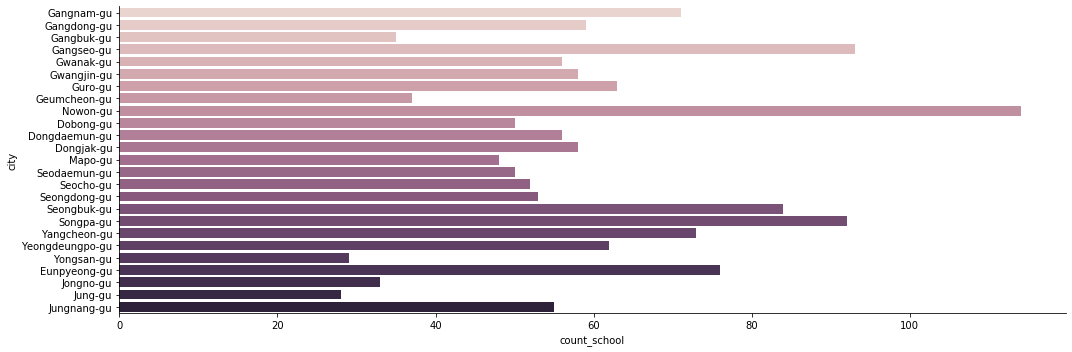

In [13]:
sns.catplot(x="count_school", y="city", palette="ch:.0", data=Seoul_df, kind="bar", aspect=3)

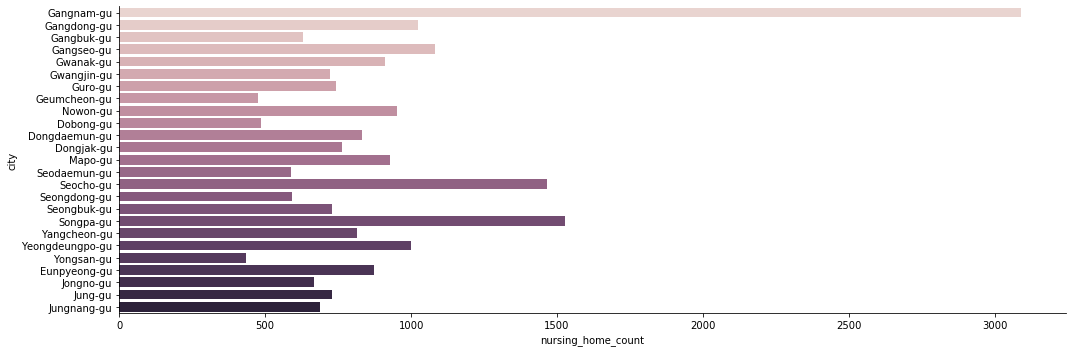

In [14]:
sns.catplot(x="nursing_home_count", y="city", palette="ch:.0", data=Seoul_df, kind="bar", aspect=3)

In [15]:
df = pd.DataFrame(data = [Seoul_df['count_school'], Seoul_df['nursing_home_count'], Seoul_df['city']])

In [16]:
df = df.T.set_index('city')

In [17]:
df

,count_school,nursing_home_count
city,,
Gangnam-gu,71,3088
Gangdong-gu,59,1023
Gangbuk-gu,35,628
Gangseo-gu,93,1080
Gwanak-gu,56,909
Gwangjin-gu,58,723
Guro-gu,63,741
Geumcheon-gu,37,475
Nowon-gu,114,952


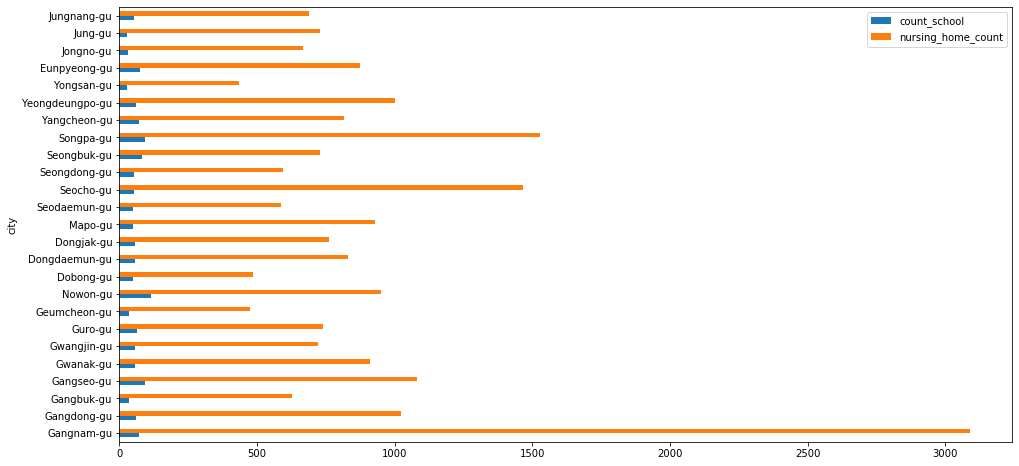

In [18]:
df.plot(kind = "barh", figsize = (16, 8))

### 함수 설정

In [19]:
def school_count_graph(province_):
    province_df = region.loc[province_].reset_index()
    if len(province_df.index) != 1:
        province_df.drop(0, inplace = True)
        
    province_df['count_school'] = province_df['elementary_school_count'] + province_df['kindergarten_count'] + province_df['university_count']
    df = pd.DataFrame(data = [province_df['count_school'], province_df['nursing_home_count'], province_df['city']])
    df = df.T.set_index('city')
    df.plot(kind = "barh", figsize = (16, 8))

### 2. 경기

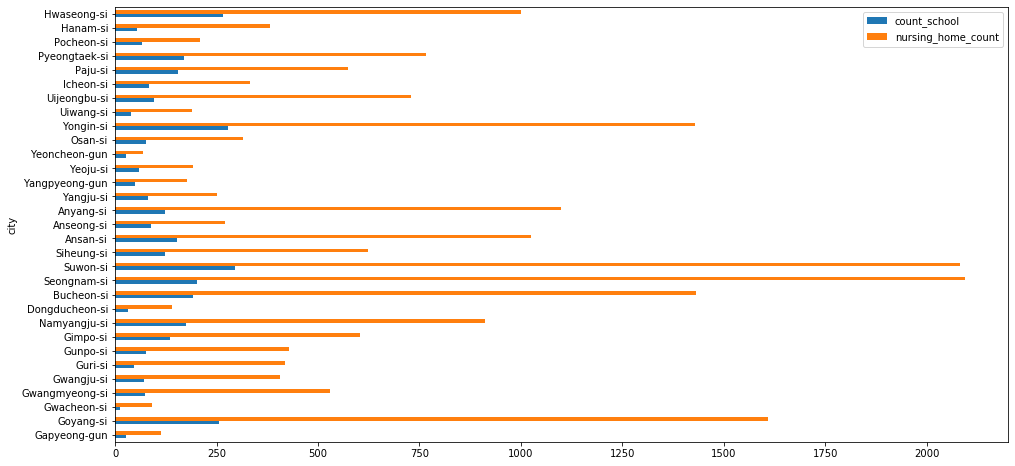

In [20]:
school_count_graph(Gyeonggi)

### 3. 부산

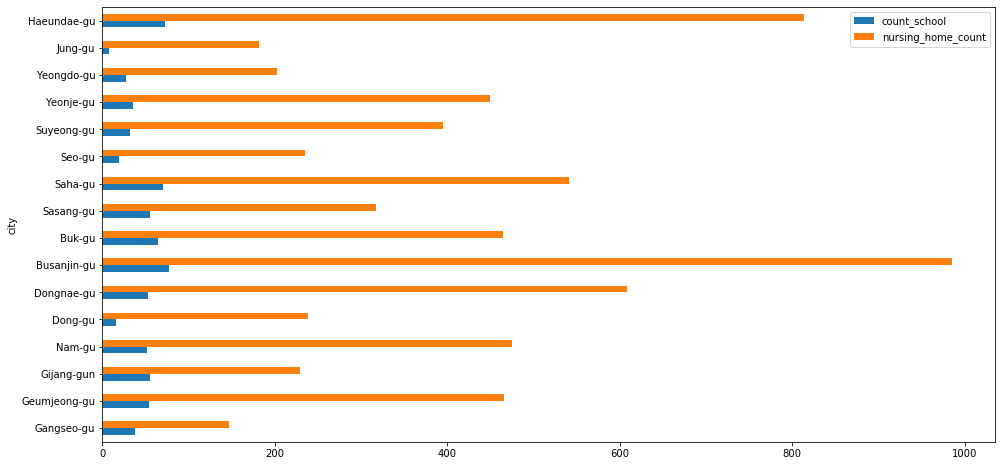

In [21]:
school_count_graph(Busan)

### 4. 대구

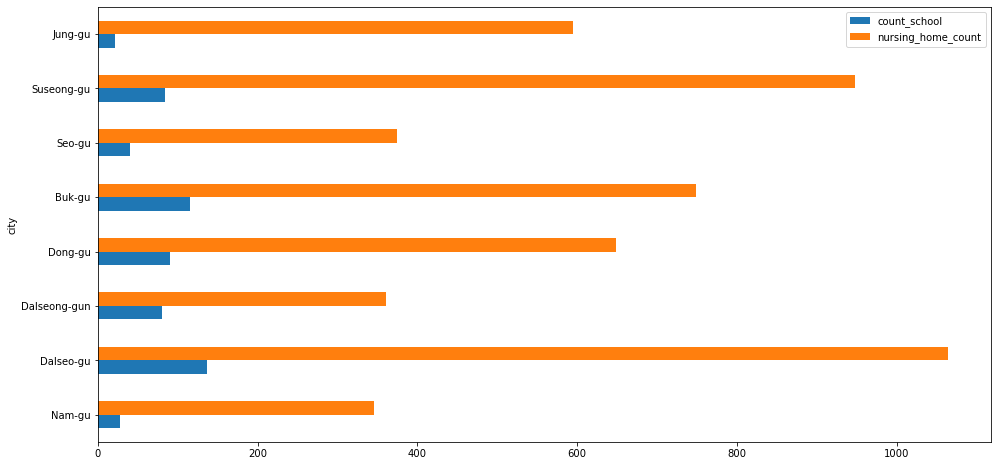

In [22]:
school_count_graph(Daegu)

### 5. 제주

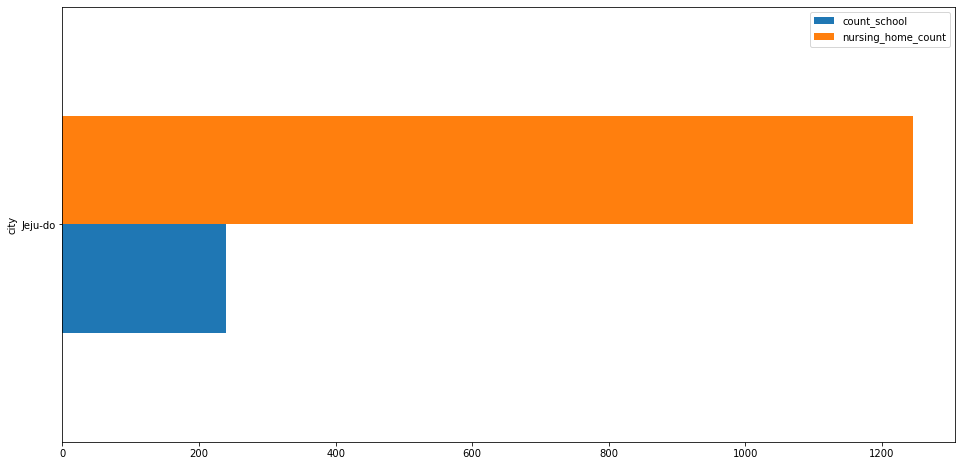

In [23]:
school_count_graph(Jeju)

지역내 도시별로 학교수와 요양원 수를 비교해보려고 하니 그 수가 너무 많고 그래프가 복잡해지는 것 같음. 또한 전국적으로 그 수치를 비교해보고 싶어서 province와 city명이 같은 index만을 따로 모아서 비교해보았다.

In [24]:
province_same_city = [26, 133, 145, 43, 69, 114, 52, 82, 199, 223, 58, 242, 161, 176, 81, 0, 75]

In [79]:
province_same_city_df = region.loc[province_same_city].reset_index()
province_same_city_df

,index,code,province,city,latitude,longitude,elementary_school_count,kindergarten_count,university_count,academy_ratio,elderly_population_ratio,elderly_alone_ratio,nursing_home_count
0,26,11000,Busan,Busan,35.179884,129.074796,304,408,22,1.40,18.41,8.6,6752
1,133,40000,Chungcheongbuk-do,Chungcheongbuk-do,36.635680,127.491384,259,328,17,1.39,17.28,8.5,2769
2,145,41000,Chungcheongnam-do,Chungcheongnam-do,36.658976,126.673318,409,499,21,1.38,18.40,8.9,3641
3,43,12000,Daegu,Daegu_all,35.872150,128.601783,229,355,11,1.62,15.78,7.5,5083
4,69,15000,Daejeon,Daejeon_all,36.350621,127.384744,148,260,15,1.49,13.65,5.8,2984
5,114,30000,Gangwon-do,Gangwon_all,37.885369,127.729868,349,368,18,1.42,19.89,9.8,2519
6,52,13000,Gwangju,Gwangju_all,35.160467,126.851392,155,312,17,2.38,13.57,6.4,2852
7,82,20000,Gyeonggi-do,Gyeonggi-do,37.275119,127.009466,1277,2237,61,1.60,12.63,5.2,20491
8,199,60000,Gyeongsangbuk-do,Gyeongsangbuk-do,36.576032,128.505599,471,707,33,1.33,20.85,11.1,4474
9,223,61000,Gyeongsangnam-do,Gyeongsangnam-do,35.238294,128.692397,501,686,21,1.78,16.51,9.1,5364


In [90]:
province_same_city_df['school_count'] = province_same_city_df['elementary_school_count'] + province_same_city_df['kindergarten_count'] + province_same_city_df['university_count']

In [86]:
korea_school_nursing_home = pd.DataFrame({'city':province_same_city_df['city'], 'school_count':province_same_city_df['school_count'], 'nursing_home_count':province_same_ci})
korea_school_nursing_home

,city,school_nursing_home
0,Busan,7486
1,Chungcheongbuk-do,3373
2,Chungcheongnam-do,4570
3,Daegu_all,5678
4,Daejeon_all,3407
5,Gangwon_all,3254
6,Gwangju_all,3336
7,Gyeonggi-do,24066
8,Gyeongsangbuk-do,5685
9,Gyeongsangnam-do,6572


In [88]:
korea_school_nursing_home = korea_school_nursing_home.T.set_index('city')

KeyError: "None of ['city'] are in the columns"

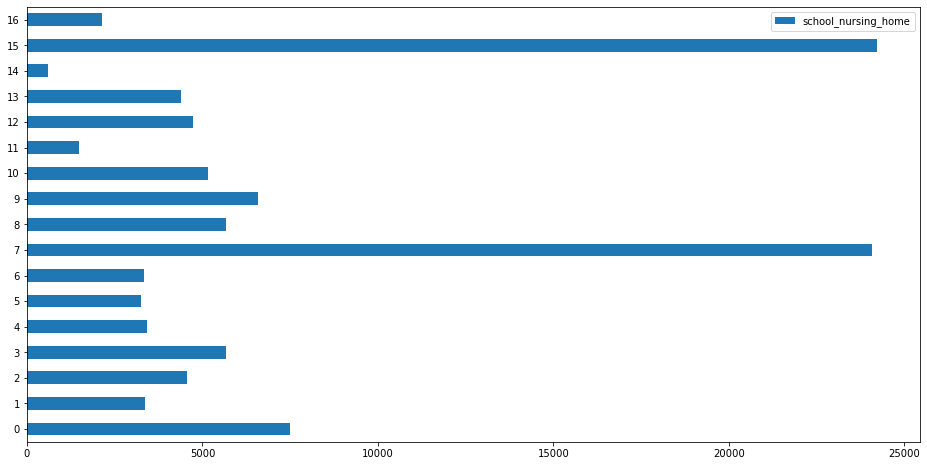

In [89]:
korea_school_nursing_home.plot(kind = "barh", figsize = (16, 8))

# 환자 정보 파악

In [30]:
Patient_Info = pd.read_csv("./Patient/PatientInfo.csv")

In [31]:
Patient_Info.head(20)

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
5,1000000006,10.0,female,1966.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,43.0,NaN,2020-01-31,2020-02-19,NaN,released
6,1000000007,11.0,male,1995.0,20s,Korea,Seoul,Jongno-gu,NaN,contact with patient,3.0,1.000000e+09,0.0,NaN,2020-01-31,2020-02-10,NaN,released
7,1000000008,13.0,male,1992.0,20s,Korea,Seoul,etc,NaN,overseas inflow,1.0,NaN,0.0,NaN,2020-02-02,2020-02-24,NaN,released
8,1000000009,19.0,male,1983.0,30s,Korea,Seoul,Songpa-gu,NaN,overseas inflow,2.0,NaN,68.0,NaN,2020-02-05,2020-02-21,NaN,released
9,1000000010,21.0,female,1960.0,60s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,3.0,1.000000e+09,6.0,NaN,2020-02-05,2020-02-29,NaN,released


In [32]:
Patient_Info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2218 entries, 0 to 2217
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          2218 non-null   int64  
 1   global_num          1314 non-null   float64
 2   sex                 2073 non-null   object 
 3   birth_year          1764 non-null   float64
 4   age                 1957 non-null   object 
 5   country             2218 non-null   object 
 6   province            2218 non-null   object 
 7   city                2153 non-null   object 
 8   disease             19 non-null     object 
 9   infection_case      1163 non-null   object 
 10  infection_order     42 non-null     float64
 11  infected_by         469 non-null    float64
 12  contact_number      411 non-null    float64
 13  symptom_onset_date  193 non-null    object 
 14  confirmed_date      2077 non-null   object 
 15  released_date       223 non-null    object 
 16  deceas

## 기존에 환자였던 이들 위주로 데이터 파악

In [33]:
have_disease = Patient_Info[~Patient_Info['disease'].isna()]
have_disease

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
388,1200000038,38.0,female,1963.0,50s,Korea,Daegu,Nam-gu,True,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased
431,1200001288,1288.0,male,1955.0,60s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-27,NaN,2020-03-02,deceased
433,1200001921,1921.0,male,1953.0,60s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-05,deceased
434,1200002085,2085.0,male,1949.0,70s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-04,deceased
436,1200002614,2614.0,female,1943.0,70s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-01,deceased
441,1200003896,3896.0,male,1933.0,80s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-03,deceased
442,1200003914,3914.0,male,1938.0,80s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-09,deceased
443,1200004046,4046.0,female,1962.0,50s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-01,deceased
444,1200005767,5767.0,male,1938.0,80s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-03-05,NaN,2020-03-05,deceased
445,1200007196,7196.0,male,1945.0,70s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-03-08,NaN,2020-03-09,deceased


In [34]:
have_disease['age'].value_counts()

50s    6
60s    5
80s    4
70s    3
30s    1
Name: age, dtype: int64

In [35]:
have_disease['sex'].value_counts()

male      14
female     5
Name: sex, dtype: int64

In [36]:
import re
date_list1 = []
date_list2 = []
period = []

for date in have_disease['confirmed_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list1.append(r.sub("\g<year>\g<month>\g<day>", date))

date_sr1 = pd.Series(data={'confirmed_date':date_list1})
date_sr1 = pd.to_numeric(date_sr1['confirmed_date'])

for date in have_disease['deceased_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list2.append(r.sub("\g<year>\g<month>\g<day>", date))
    
date_sr2 = pd.Series(data={'deceased_date':date_list2})
date_sr2 = pd.to_numeric(date_sr2['deceased_date'])

In [37]:
df = pd.DataFrame(data={'confirmed_date': date_sr1, 'deceased_date': date_sr2})
df.loc[ df['deceased_date'] > 20200229, 'deceased_date'] = df['deceased_date']-71
df.loc[ df['confirmed_date'] > 20200229, 'confirmed_date'] = df['confirmed_date']-71
df['period'] = df['deceased_date'] - df['confirmed_date']
df

,confirmed_date,deceased_date,period
0,20200218,20200223,5
1,20200227,20200231,4
2,20200228,20200234,6
3,20200228,20200233,5
4,20200229,20200230,1
5,20200230,20200232,2
6,20200230,20200238,8
7,20200230,20200230,0
8,20200234,20200234,0
9,20200237,20200238,1


In [38]:
df['period'].value_counts()

 0    4
 4    3
 1    3
 3    2
 5    2
-1    2
 8    1
 6    1
 2    1
Name: period, dtype: int64

In [39]:
have_disease[have_disease['infection_case'] == 'Cheongdo Daenam Hospital']['age'].value_counts()

50s    4
60s    3
Name: age, dtype: int64

1. 나이는 대부분 50대 이상 환자들
2. 남성 14, 여성 5
3. 기존에 환자였던 코로나 양성 환자들은 전부 사망하였음
4. 19명의 환자들 중 7명이 청도 대남 병원 출신, 1명은 태백시 환자 접촉자
5. 코로나 확진판정 이후 대부분 4일 이내로 사망 
6. 특히 청도 대남 병원 출신들은 19~22일 사이에 대부분 사망하였음. (50대 4명, 60대 3명)

## 환자는 아니지만 결국엔 사망했던 사람들 정보 파악

In [40]:
Patient_Info[Patient_Info['state'] == 'deceased']

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
388,1200000038,38.0,female,1963.0,50s,Korea,Daegu,Nam-gu,True,NaN,NaN,NaN,NaN,NaN,2020-02-18,NaN,2020-02-23,deceased
427,1200000114,114.0,male,1946.0,70s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-26,deceased
428,1200000620,620.0,male,1949.0,70s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-24,NaN,2020-03-02,deceased
429,1200000901,901.0,female,1934.0,80s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,NaN,2020-03-04,deceased
430,1200001064,1064.0,female,1943.0,70s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,NaN,2020-03-01,deceased
431,1200001288,1288.0,male,1955.0,60s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-27,NaN,2020-03-02,deceased
432,1200001443,1443.0,male,1945.0,70s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-27,NaN,2020-02-27,deceased
433,1200001921,1921.0,male,1953.0,60s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-05,deceased
434,1200002085,2085.0,male,1949.0,70s,Korea,Daegu,NaN,True,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-04,deceased
435,1200002289,2289.0,male,1954.0,60s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-05,deceased


In [41]:
deceased_patient = Patient_Info[Patient_Info['state'] == 'deceased']

In [42]:
not_disease = deceased_patient[~(deceased_patient['disease'] == True)]

In [43]:
not_disease

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
427,1200000114,114.0,male,1946.0,70s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-26,deceased
428,1200000620,620.0,male,1949.0,70s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-24,NaN,2020-03-02,deceased
429,1200000901,901.0,female,1934.0,80s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,NaN,2020-03-04,deceased
430,1200001064,1064.0,female,1943.0,70s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,NaN,2020-03-01,deceased
432,1200001443,1443.0,male,1945.0,70s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-27,NaN,2020-02-27,deceased
435,1200002289,2289.0,male,1954.0,60s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-05,deceased
437,1200002769,2769.0,female,1934.0,80s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-02,deceased
438,1200002936,2936.0,male,1939.0,80s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-06,deceased
439,1200003550,3550.0,female,1951.0,60s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-09,deceased
440,1200003578,3578.0,male,1930.0,90s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-07,deceased


In [44]:
not_disease['age'].value_counts()

70s    5
80s    3
60s    2
40s    1
90s    1
Name: age, dtype: int64

In [45]:
not_disease['sex'].value_counts()

male      8
female    4
Name: sex, dtype: int64

In [46]:
not_disease['age'].isna()

427     False
428     False
429     False
430     False
432     False
435     False
437     False
438     False
439     False
440     False
1611    False
1910    False
1946     True
Name: age, dtype: bool

In [47]:
not_disease.dropna(subset = ['confirmed_date', 'deceased_date'], inplace = True)

C:\Users\cjy89\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [48]:
import re
date_list1 = []
date_list2 = []
period = []

for date in not_disease['confirmed_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list1.append(r.sub("\g<year>\g<month>\g<day>", date))

date_sr1 = pd.Series(data={'confirmed_date':date_list1})
date_sr1 = pd.to_numeric(date_sr1['confirmed_date'])

for date in not_disease['deceased_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list2.append(r.sub("\g<year>\g<month>\g<day>", date))
    
date_sr2 = pd.Series(data={'deceased_date':date_list2})
date_sr2 = pd.to_numeric(date_sr2['deceased_date'])

In [49]:
df = pd.DataFrame(data={'confirmed_date': date_sr1, 'deceased_date': date_sr2})
df.loc[ df['deceased_date'] > 20200229, 'deceased_date'] = df['deceased_date']-71
df.loc[ df['confirmed_date'] > 20200229, 'confirmed_date'] = df['confirmed_date']-71
df['period'] = df['deceased_date'] - df['confirmed_date']
df

,confirmed_date,deceased_date,period
0,20200221,20200226,5
1,20200224,20200231,7
2,20200225,20200233,8
3,20200226,20200230,4
4,20200227,20200227,0
5,20200228,20200234,6
6,20200229,20200231,2
7,20200229,20200235,6
8,20200230,20200238,8
9,20200230,20200236,6


In [50]:
df['period'].value_counts()

6    3
8    2
7    1
5    1
4    1
2    1
1    1
0    1
Name: period, dtype: int64

In [51]:
not_disease = deceased_patient[~(deceased_patient['disease'] == True)]

In [52]:
not_disease

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
427,1200000114,114.0,male,1946.0,70s,Korea,Daegu,NaN,NaN,Shincheonji Church,NaN,NaN,NaN,NaN,2020-02-21,NaN,2020-02-26,deceased
428,1200000620,620.0,male,1949.0,70s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-24,NaN,2020-03-02,deceased
429,1200000901,901.0,female,1934.0,80s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-25,NaN,2020-03-04,deceased
430,1200001064,1064.0,female,1943.0,70s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-26,NaN,2020-03-01,deceased
432,1200001443,1443.0,male,1945.0,70s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-27,NaN,2020-02-27,deceased
435,1200002289,2289.0,male,1954.0,60s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-28,NaN,2020-03-05,deceased
437,1200002769,2769.0,female,1934.0,80s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-02,deceased
438,1200002936,2936.0,male,1939.0,80s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-02-29,NaN,2020-03-06,deceased
439,1200003550,3550.0,female,1951.0,60s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-09,deceased
440,1200003578,3578.0,male,1930.0,90s,Korea,Daegu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-01,NaN,2020-03-07,deceased


In [53]:
not_disease[not_disease['province'] == 'Daegu']['age'].value_counts()

70s    4
80s    3
60s    2
90s    1
Name: age, dtype: int64

1. 이 역시 대부분 2명을 제외하고는 모두 50대 이상 (40대 1명, NaN 데이터 1명)
2. 남성 8명, 여성 4명 (NaN 데이터 1명)
3. 신천지 관련 환자 1명 (70대 남성)
4. '대구'지역 환자가 전체 13명중 10명으로 높은 비율을 차지
5. 기존에 환자였던 사람들에 비해 생존기간이 더 길었음. 대부분 4일 이상

데이터를 확인해보니 state에 어떤 라벨이 있는지 궁금해졌음

In [54]:
Patient_Info['state'].value_counts()

isolated    1791
released     307
deceased      32
Name: state, dtype: int64

In [55]:
Patient_Info[Patient_Info['state'].isna()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88 entries, 802 to 2213
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          88 non-null     int64  
 1   global_num          81 non-null     float64
 2   sex                 88 non-null     object 
 3   birth_year          88 non-null     float64
 4   age                 1 non-null      object 
 5   country             88 non-null     object 
 6   province            88 non-null     object 
 7   city                88 non-null     object 
 8   disease             0 non-null      object 
 9   infection_case      87 non-null     object 
 10  infection_order     0 non-null      float64
 11  infected_by         67 non-null     float64
 12  contact_number      2 non-null      float64
 13  symptom_onset_date  6 non-null      object 
 14  confirmed_date      88 non-null     object 
 15  released_date       0 non-null      object 
 16  deceas

In [56]:
Patient_Info[Patient_Info['state'].isna()]

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
802,2000000214,8168.0,female,1967.0,NaN,Korea,Gyeonggi-do,Seongnam-si,NaN,contact with patient,NaN,2.000000e+09,2.0,NaN,2020-03-15,NaN,NaN,NaN
803,2000000215,8195.0,female,1974.0,NaN,Korea,Gyeonggi-do,Bucheon-si,NaN,contact with patient,NaN,2.000000e+09,NaN,NaN,2020-03-15,NaN,NaN,NaN
804,2000000216,8212.0,female,1963.0,NaN,Korea,Gyeonggi-do,Seongnam-si,NaN,etc,NaN,NaN,11.0,2020-03-13,2020-03-15,NaN,NaN,NaN
805,2000000217,8205.0,female,1954.0,NaN,Korea,Gyeonggi-do,Seongnam-si,NaN,contact with patient,NaN,2.000000e+09,NaN,NaN,2020-03-15,NaN,NaN,NaN
806,2000000218,8184.0,female,1992.0,NaN,Korea,Gyeonggi-do,Seongnam-si,NaN,contact with patient,NaN,2.000000e+09,NaN,NaN,2020-03-15,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,2000000297,8473.0,female,1969.0,NaN,Korea,Gyeonggi-do,Seongnam-si,NaN,contact with patient,NaN,NaN,NaN,NaN,2020-03-18,NaN,NaN,NaN
886,2000000298,8503.0,female,1969.0,NaN,Korea,Gyeonggi-do,Namyangju-si,NaN,contact with patient,NaN,2.000000e+09,NaN,NaN,2020-03-18,NaN,NaN,NaN
887,2000000299,NaN,female,1985.0,NaN,Korea,Gyeonggi-do,Namyangju-si,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-18,NaN,NaN,NaN
888,2000000300,NaN,male,1989.0,NaN,Korea,Gyeonggi-do,Seongnam-si,NaN,overseas inflow,NaN,NaN,NaN,NaN,2020-03-18,NaN,NaN,NaN


## 치료된 환자

In [57]:
released_patient = Patient_Info[Patient_Info['state'] == 'released']

In [58]:
released_patient

,patient_id,global_num,sex,birth_year,age,country,province,city,disease,infection_case,infection_order,infected_by,contact_number,symptom_onset_date,confirmed_date,released_date,deceased_date,state
0,1000000001,2.0,male,1964.0,50s,Korea,Seoul,Gangseo-gu,NaN,overseas inflow,1.0,NaN,75.0,2020-01-22,2020-01-23,2020-02-05,NaN,released
1,1000000002,5.0,male,1987.0,30s,Korea,Seoul,Jungnang-gu,NaN,overseas inflow,1.0,NaN,31.0,NaN,2020-01-30,2020-03-02,NaN,released
2,1000000003,6.0,male,1964.0,50s,Korea,Seoul,Jongno-gu,NaN,contact with patient,2.0,2.002000e+09,17.0,NaN,2020-01-30,2020-02-19,NaN,released
3,1000000004,7.0,male,1991.0,20s,Korea,Seoul,Mapo-gu,NaN,overseas inflow,1.0,NaN,9.0,2020-01-26,2020-01-30,2020-02-15,NaN,released
4,1000000005,9.0,female,1992.0,20s,Korea,Seoul,Seongbuk-gu,NaN,contact with patient,2.0,1.000000e+09,2.0,NaN,2020-01-31,2020-02-24,NaN,released
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2208,6102000080,NaN,female,1969.0,50s,Korea,Gyeongsangnam-do,Geochang-gun,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-06,NaN,NaN,released
2210,6102000082,NaN,male,1963.0,50s,Korea,Gyeongsangnam-do,Geochang-gun,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-07,NaN,NaN,released
2211,6101000083,NaN,male,1992.0,20s,Korea,Gyeongsangnam-do,Geoje-si,NaN,NaN,NaN,NaN,NaN,NaN,2020-03-10,NaN,NaN,released
2215,7000000002,222.0,female,1998.0,20s,Korea,Jeju-do,Jeju-do,NaN,etc,NaN,NaN,84.0,NaN,2020-02-22,2020-03-07,NaN,released


In [59]:
released_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307 entries, 0 to 2216
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          307 non-null    int64  
 1   global_num          175 non-null    float64
 2   sex                 306 non-null    object 
 3   birth_year          277 non-null    float64
 4   age                 305 non-null    object 
 5   country             307 non-null    object 
 6   province            307 non-null    object 
 7   city                294 non-null    object 
 8   disease             0 non-null      object 
 9   infection_case      215 non-null    object 
 10  infection_order     32 non-null     float64
 11  infected_by         89 non-null     float64
 12  contact_number      124 non-null    float64
 13  symptom_onset_date  34 non-null     object 
 14  confirmed_date      307 non-null    object 
 15  released_date       223 non-null    object 
 16  decease

In [60]:
index_list = released_patient[~released_patient['deceased_date'].isna()].index

In [61]:
released_patient.drop(index_list, inplace = True)

C:\Users\cjy89\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [62]:
released_patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 2216
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   patient_id          305 non-null    int64  
 1   global_num          173 non-null    float64
 2   sex                 304 non-null    object 
 3   birth_year          275 non-null    float64
 4   age                 303 non-null    object 
 5   country             305 non-null    object 
 6   province            305 non-null    object 
 7   city                292 non-null    object 
 8   disease             0 non-null      object 
 9   infection_case      213 non-null    object 
 10  infection_order     32 non-null     float64
 11  infected_by         88 non-null     float64
 12  contact_number      124 non-null    float64
 13  symptom_onset_date  34 non-null     object 
 14  confirmed_date      305 non-null    object 
 15  released_date       223 non-null    object 
 16  decease

In [63]:
released_patient['age'].value_counts()

20s    90
50s    56
40s    48
30s    48
60s    18
10s    17
70s    15
0s      8
80s     3
Name: age, dtype: int64

In [64]:
released_patient['sex'].value_counts()

female    171
male      133
Name: sex, dtype: int64

In [65]:
released_patient['infection_case'].value_counts()

contact with patient             80
etc                              50
Shincheonji Church               26
overseas inflow                  22
Onchun Church                    15
gym facility in Cheonan           8
Eunpyeong St. Mary's Hospital     7
Suyeong-gu Kindergarten           2
Pilgrimage to Israel              1
Seongdong-gu APT                  1
Cheongdo Daenam Hospital          1
Name: infection_case, dtype: int64

In [66]:
released_patient['province'].value_counts()

Gyeongsangbuk-do     87
Seoul                57
Busan                37
Gyeongsangnam-do     31
Chungcheongnam-do    30
Gyeonggi-do          16
Ulsan                10
Gwangju               8
Daejeon               7
Gangwon-do            6
Jeollabuk-do          4
Daegu                 4
Jeju-do               2
Chungcheongbuk-do     2
Jeollanam-do          2
Incheon               2
Name: province, dtype: int64

In [67]:
df = pd.DataFrame({'confirmed_date':released_patient['confirmed_date'], 'released_date':released_patient['released_date']})
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 305 entries, 0 to 2216
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   confirmed_date  305 non-null    object
 1   released_date   223 non-null    object
dtypes: object(2)
memory usage: 7.1+ KB


In [68]:
df = df[~df['released_date'].isna()]
df

,confirmed_date,released_date
0,2020-01-23,2020-02-05
1,2020-01-30,2020-03-02
2,2020-01-30,2020-02-19
3,2020-01-30,2020-02-15
4,2020-01-31,2020-02-24
...,...,...
2060,2020-02-28,2020-03-10
2062,2020-02-29,2020-03-12
2071,2020-03-03,2020-03-14
2215,2020-02-22,2020-03-07


In [69]:
import re
from datetime import date
date_list1 = []
date_list2 = []
period = []

for date in df['confirmed_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list1.append(r.sub("\g<year>\g<month>\g<day>", date))

date_sr1 = pd.Series(data={'confirmed_date':date_list1})
date_sr1 = pd.to_datetime(date_sr1['confirmed_date'])

for date in df['released_date']:
    r = re.compile("(?P<year>\d+)[-](?P<month>\d+)[-](?P<day>\d+)")
    date_list2.append(r.sub("\g<year>\g<month>\g<day>", date))

date_sr2 = pd.Series(data={'released_date':date_list2})
date_sr2 = pd.to_datetime(date_sr2['released_date'])
df_ = pd.DataFrame(data={'confirmed_date': date_sr1, 'released_date': date_sr2})
df_

,confirmed_date,released_date
0,2020-01-23,2020-02-05
1,2020-01-30,2020-03-02
2,2020-01-30,2020-02-19
3,2020-01-30,2020-02-15
4,2020-01-31,2020-02-24
...,...,...
218,2020-02-28,2020-03-10
219,2020-02-29,2020-03-12
220,2020-03-03,2020-03-14
221,2020-02-22,2020-03-07


In [70]:
df_['period'] = df_['released_date'] - df_['confirmed_date']
df_period = df_['period'].dt.days

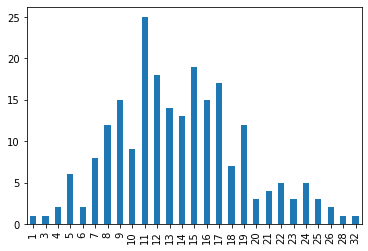

In [71]:
df_period.value_counts().sort_index().plot(kind = 'bar')

In [72]:
released_patient['released_date'].value_counts().sort_index()

2020-02-05     1
2020-02-06     1
2020-02-09     1
2020-02-10     1
2020-02-12     3
2020-02-15     2
2020-02-17     1
2020-02-18     2
2020-02-19     2
2020-02-20     2
2020-02-21     1
2020-02-24     4
2020-02-26     2
2020-02-27     3
2020-02-28     1
2020-02-29     2
2020-03-01     1
2020-03-02     3
2020-03-03     9
2020-03-04    14
2020-03-05     5
2020-03-06    10
2020-03-07     3
2020-03-08     2
2020-03-09     4
2020-03-10     7
2020-03-11    18
2020-03-12    15
2020-03-13    23
2020-03-14    23
2020-03-15     9
2020-03-16    17
2020-03-17    14
2020-03-18    15
2020-03-19     2
Name: released_date, dtype: int64

1. 완치되었지만 deceased_date가 있는 환자가 존재하여 의미를 알수 없어 일단 drop했음
2. 완치된 환자는 20대가 90명으로 제일 많으며, 그 다음은 50, 40, 30이 각각 56, 48, 48로 많았다.
3. 남성 171명, 여성 133명
4. 완치된 환자들은 주로 일반적인 환자 접촉이 80명으로 제일 많았음. 그 다음이 신천지, 해외입국자, 온천교회 순으로 많았다.
 - 일단, contact with patient의 의미를 잘 모르겠음. 그냥 patient와 직접접촉한 사람들인가? 아니면 지역사회감염인가?
5. 또 완치된 환자들은 경상북도가 87명, 서울 57명, 대구가 4명
 - 대구 완치자가 4명?? 살짝 이해가 안됨

# 지역별 환자 수

In [73]:
Patient_Info['province'].value_counts()

Gyeongsangbuk-do     1054
Gyeonggi-do           300
Seoul                 282
Chungcheongnam-do     118
Busan                 101
Gyeongsangnam-do       85
Daegu                  63
Sejong                 41
Incheon                32
Ulsan                  30
Gangwon-do             29
Chungcheongbuk-do      28
Daejeon                22
Gwangju                18
Jeollabuk-do            7
Jeju-do                 4
Jeollanam-do            4
Name: province, dtype: int64

 - 대구 6587 -> 63명
 - 서울 390 -> 282명
 - 부산 114 -> 101명
 - 경북 1285 -> 1054명
 - 경기 433 -> 300명
 - 경남 91 -> 85명

...

확진자 수가 제일 먼저 폭발적으로 증가했던 대구지역이 다른 지역에 비해 데이터가 아주아주아주 많이 부족함. 의미있는 데이터 분석이 충분히 되지 않을 것이라 판단. 외부 데이터가 필수적으로 필요할것같음



In [74]:
Patient_Info['infection_case'].value_counts()

contact with patient                530
etc                                 220
Guro-gu Call Center                 102
Shincheonji Church                   86
overseas inflow                      61
Onchun Church                        33
gym facility in Cheonan              30
Ministry of Oceans and Fisheries     27
Cheongdo Daenam Hospital             21
Dongan Church                        17
Eunpyeong St. Mary's Hospital        14
Seongdong-gu APT                     13
gym facility in Sejong                4
Suyeong-gu Kindergarten               3
Pilgrimage to Israel                  1
River of Grace Community Church       1
Name: infection_case, dtype: int64